In [93]:
#filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [94]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
#reading the application data
app_df = pd.read_csv("application_data.csv")

In [96]:
#exploring the dataset
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
#checking the data types of each column
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [102]:
#checking the number of rows and columns
app_df.shape

(307511, 122)

In [103]:
#checking summary of numeric columns
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [104]:
#finding percentage of null values
null_perc = (app_df.isnull().sum()/len(app_df))*100
null_perc.sort_values(ascending=False)

COMMONAREA_MEDI                69.872297
COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
NONLIVINGAPARTMENTS_MODE       69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_MEDI          68.354953
LIVINGAPARTMENTS_MODE          68.354953
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_MEDI                 67.848630
FLOORSMIN_MODE                 67.848630
FLOORSMIN_AVG                  67.848630
YEARS_BUILD_MEDI               66.497784
YEARS_BUILD_AVG                66.497784
YEARS_BUILD_MODE               66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_MODE                  59.376738
LANDAREA_AVG                   59.376738
LANDAREA_MEDI                  59.376738
BASEMENTAREA_MEDI              58.515956
BASEMENTAREA_AVG               58.515956
BASEMENTAREA_MODE              58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_ME

In [105]:
#checking for columns with null values percentage >= 50
null_col = list(null_perc[null_perc.values>=50].index)
print(len(null_col))

41


In [106]:
#dropping the columns with null values percentage >=50
app_df.drop(labels=null_col, axis=1, inplace=True)

In [107]:
#retreiving the columns with any null values
null = (app_df.isnull().sum()/len(app_df))*100
null[null>0].sort_values(ascending=False)

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

From the above list the columns that have less than 13% missing values are
NAME_TYPE_SUITE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE,
DEF_60_CNT_SOCIAL_CIRCLE, EXT_SOURCE_2, AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE

Checking a few columns below:

In [108]:
#NAME_TYPE_SUITE
print(app_df.NAME_TYPE_SUITE.unique())
#since its a categorical variable we'll go for mode of the variable
print(app_df.NAME_TYPE_SUITE.mode())
#we can impute the missing values of this column with the mode i.e. 'Unaccompanied'

['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
0    Unaccompanied
dtype: object


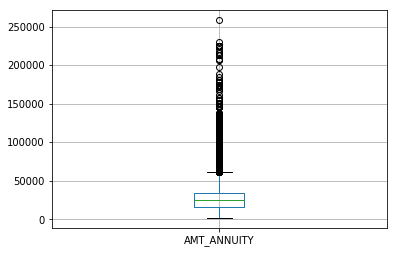

24903.0

In [109]:
#AMT_ANNUITY
app_df.boxplot(column=['AMT_ANNUITY'])
plt.show()
#as we can see there are outliers present, therefore median would be the right choice
app_df.AMT_ANNUITY.median()
#we can impute the missing values of this column with median i.e. 24903

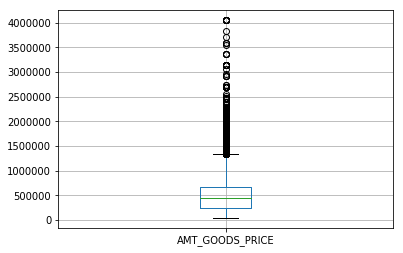

450000.0

In [110]:
#AMT_GOODS_PRICE
app_df.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()
#as we can see there are outliers present, therefore median would be the right choice as it does not get affected by the outliers
app_df.AMT_GOODS_PRICE.median()
#we can impute the missing values of this column with median i.e. 450000

###### imputation overview
as we can see, for columns with numerical data, there is a chance of having outliers, if there are outliers present,
median is the right choice for inputation of missing values as it does not get affected by outliers , if there are no outliers present then we can impute the missing values with mean as well

for columns with categorical data, mode is the right choice for imputation of the missing values

In [111]:
#dropping columns that are not needed for further analysis
#the below columns are not useful acoording to business perspective
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_df.drop(labels=unwanted,axis=1,inplace=True)

In the columns below that have negative or mixed values, we will replace them with the absolute values for our analysis

In [112]:
#checking for columns starting with 'DAYS' and their values for negative values treatment
filter_col = []
for col in app_df:
    if col.startswith('DAYS'):
        print(col, ' ' , app_df[col].unique())
        filter_col.append(col)
        
print(filter_col)        

DAYS_BIRTH   [ -9461 -16765 -19046 ...  -7951  -7857 -25061]
DAYS_EMPLOYED   [  -637  -1188   -225 ... -12971 -11084  -8694]
DAYS_REGISTRATION   [ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
DAYS_ID_PUBLISH   [-2120  -291 -2531 ... -6194 -5854 -6211]
DAYS_LAST_PHONE_CHANGE   [-1134.  -828.  -815. ... -3988. -3899. -3538.]
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [113]:
#replacing the negative values with absolute values
app_df[filter_col] = abs(app_df[filter_col])

In [114]:
#checking the imputed values
app_df[filter_col]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
5,16941.0,1588.0,4970.0,477.0,2536.0
6,13778.0,3130.0,1213.0,619.0,1562.0
7,18850.0,449.0,4597.0,2379.0,1070.0
8,20099.0,365243.0,7427.0,3514.0,0.0
9,14469.0,2019.0,14437.0,3992.0,1673.0


In [115]:
#describing the gender column to check the categories and their count
app_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [116]:
#imputing XNA with the most occured gender that is F for ease in further analysis
app_df.loc[app_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [117]:
#describing ORGANIZATION_TYPE column to check the categories and their count
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [118]:
#replacing XNA values with NaN because XNA means not available
app_df = app_df.replace('XNA',np.NaN)

In [119]:
#cross checking the column after the imputation
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [120]:
#creating bins for income
app_df['AMT_INCOME_RANGE'] = pd.qcut(app_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df["AMT_INCOME_RANGE"].head(10)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): [VERY_LOW < LOW < MEDIUM < HIGH < VERY_HIGH]

In [121]:
#creating bins for credit amount
app_df['AMT_CREDIT_RANGE'] = pd.qcut(app_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_CREDIT_RANGE'].head(10)


0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): [VERY_LOW < LOW < MEDIUM < HIGH < VERY_HIGH]

In [122]:
#checking data type of DAYS_BIRTH column
app_df['DAYS_BIRTH'].dtypes

dtype('float64')

In [123]:
#converting the the client's age in days to years for better understanding
app_df['DAYS_BIRTH'] = (app_df['DAYS_BIRTH']/365).astype(int)

In [124]:
#creating bins for age
app_df['DAYS_BIRTH_RANGE']=pd.cut(app_df['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
app_df['DAYS_BIRTH_RANGE'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_RANGE, dtype: int64

In [125]:
#Dividing the target variable into two groups. Target=1 (client with payment difficulties) and Target=0 (all other cases)
target0=app_df.loc[app_df["TARGET"]==0]
target1=app_df.loc[app_df["TARGET"]==1]

In [126]:
#Calculating imbalance percentage
round((len(target0)/len(target1)),2)

11.39

Imbalance ratio is 11.39

# Data Analysis

###### Finding Outliers

In [129]:
#defining a function for outliers distribution
def outliers_distribution(data, col, title):
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=app_df, y=col)
    plt.show()
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lowerwhisker=(Q1 - 1.5 * IQR)
    upperwhisker=(Q3 + 1.5 * IQR)
    print("The values greater than {} can be considered as outliers".format(upperwhisker))

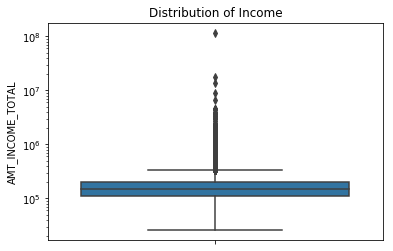

The values greater than 337500.0 can be considered as outliers


In [130]:
#finding outliers for 'AMT_INCOME_TOATAL'
outliers_distribution(data=app_df, col=app_df['AMT_INCOME_TOTAL'], title = 'Distribution of Income')

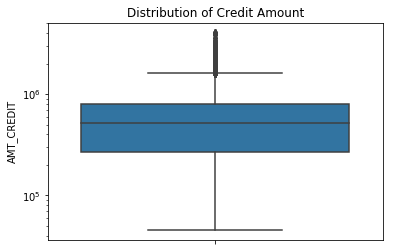

The values greater than 1616625.0 can be considered as outliers


In [131]:
#finding outliers for 'AMT_CREDIT'
outliers_distribution(data=app_df, col=app_df['AMT_CREDIT'], title = 'Distribution of Credit Amount')

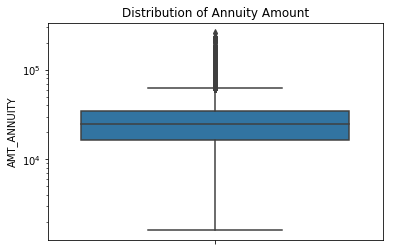

The values greater than 61704.0 can be considered as outliers


In [132]:
#finding outliers for 'AMT_ANNUITY'
outliers_distribution(data=app_df, col=app_df['AMT_ANNUITY'], title = 'Distribution of Annuity Amount')

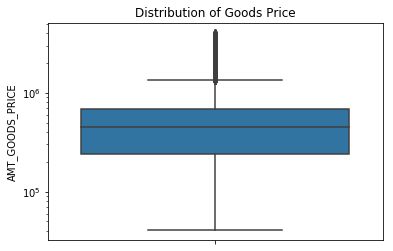

The values greater than 1341000.0 can be considered as outliers


In [133]:
#finding outliers for 'AMT_GOODS_PRICE'
outliers_distribution(data=app_df, col=app_df['AMT_GOODS_PRICE'], title = 'Distribution of Goods Price')

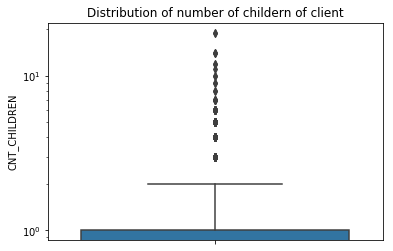

The values greater than 2.5 can be considered as outliers


In [135]:
#finding outliers for 'CNT_CHILDREN'
outliers_distribution(data=app_df, col=app_df['CNT_CHILDREN'], title = 'Distribution of number of childern of client')

Since number of childern can only be a whole number therefore, we can take values greater than 3 (instead of 2.5) as outliers

## Univariate analysis

Performing univariate analysis taking one column at a time for both target 0 and target 1

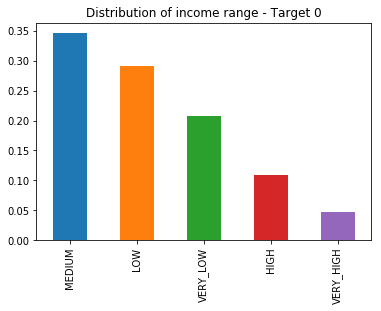

In [136]:
#AMT-INCOME_RANGE for target 0
target0.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of income range - Target 0')
plt.show()

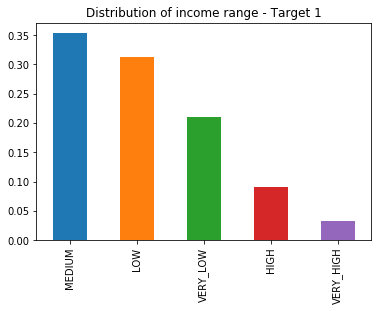

In [137]:
#AMT-INCOME_RANGE for target 1
target1.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of income range - Target 1')
plt.show()

Medium income range people are taking loans the most it appears. the order of distribution is same in both the cases. Although for target 1 the bar of high and very high income groups is a little lower than target0 case, it seems there are very less people with payment difficulties.
The bar of medium and low income groups is a little higher in target1 case, that means there are more people in these two groups with payment difficulties

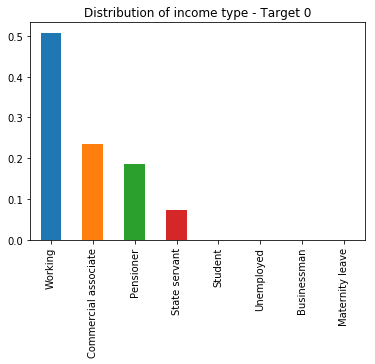

In [138]:
#NAME_INCOME_TYPE for Target 0
target0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of income type - Target 0')
plt.show()

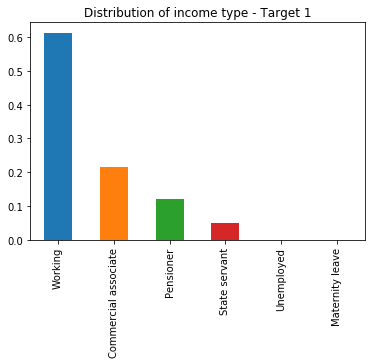

In [139]:
#NAME_INCOME_TYPE for Target 1
target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of income type - Target 1')
plt.show()

order of distribution is the same in both cases.
working people are taking loans the most, giving business to bank, but at the same time they are the most with payment difficulties as well.
Pensioner and State servant with payment difficulties are lesser in number so its less trouble for bank.

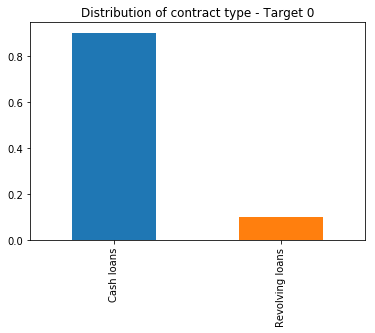

In [140]:
#CONTRACT_TYPE for target 0
target0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of contract type - Target 0')
plt.show()

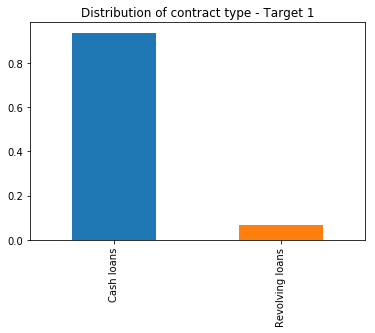

In [141]:
#CONTRACT_TYPE for target 1
target1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of contract type - Target 1')
plt.show()

There is not much difference in both the graphs. But clearly revolving loans are lesser in number with payment difficulties

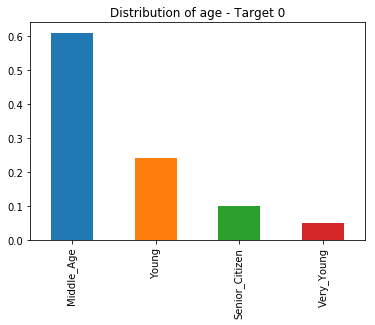

In [142]:
#DAYS_BIRTH_RANGE for target 0
target0.DAYS_BIRTH_RANGE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of age - Target 0')
plt.show()

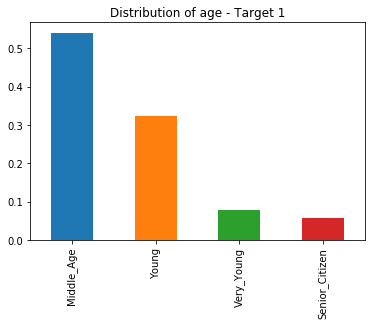

In [143]:
#DAYS_BIRTH_RANGE for target 1
target1.DAYS_BIRTH_RANGE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of age - Target 1')
plt.show()

clearly, middle age people are taking the most loans. middle age people are having the most payment difficulties as well.
it seems very young people are having more difficulty in making payments, there are very few very young people with no payment difficulties.

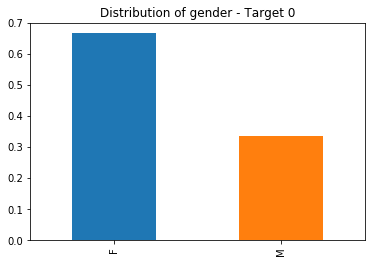

In [144]:
#CODE_GENDER for target 0
target0.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title('Distribution of gender - Target 0')
plt.show()

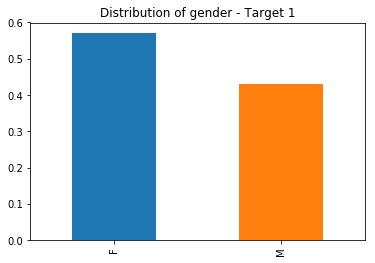

In [145]:
#CODE_GENDER for target 1
target1.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title('Distribution of gender - Target 1')
plt.show()

Clearly, females are taking more loans than males. females are more in both the cases.

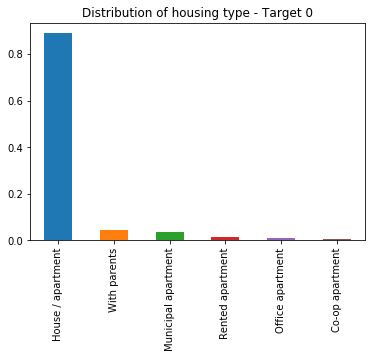

In [146]:
#NAME_HOUSING_TYPE for target 0
target0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of housing type - Target 0')
plt.show()

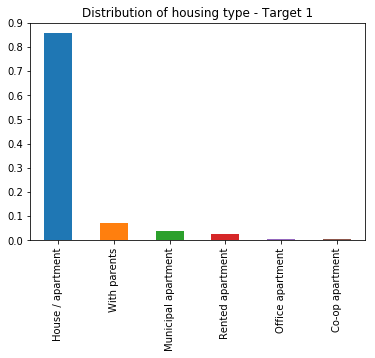

In [147]:
#NAME_HOUSING_TYPE for target 1
target1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of housing type - Target 1')
plt.show()

People with their own house/apartment are taking most loans and are present in both the cases with highest number.

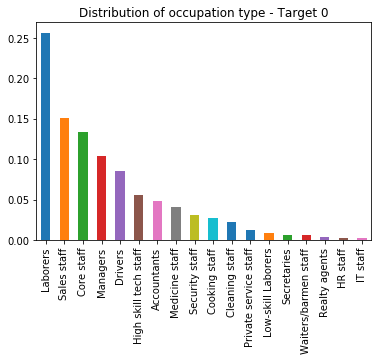

In [148]:
#OCCUPATION_TYPE for target 0
target0.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of occupation type - Target 0')
plt.show()

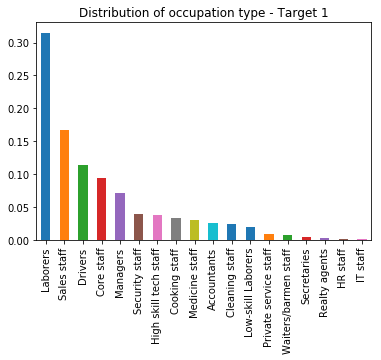

In [149]:
#OCCUPATION_TYPE for target 1
target1.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Distribution of occupation type - Target 1')
plt.show()

Laboreres are taking more loans. they are higher in number in both the cases. there are more labourers with payment difficulties and less lebourers with no payment difficulties
there is some shift in the order of the groups in second graph. there are some occupations having more payment difficulties and some with less payment difficulties.

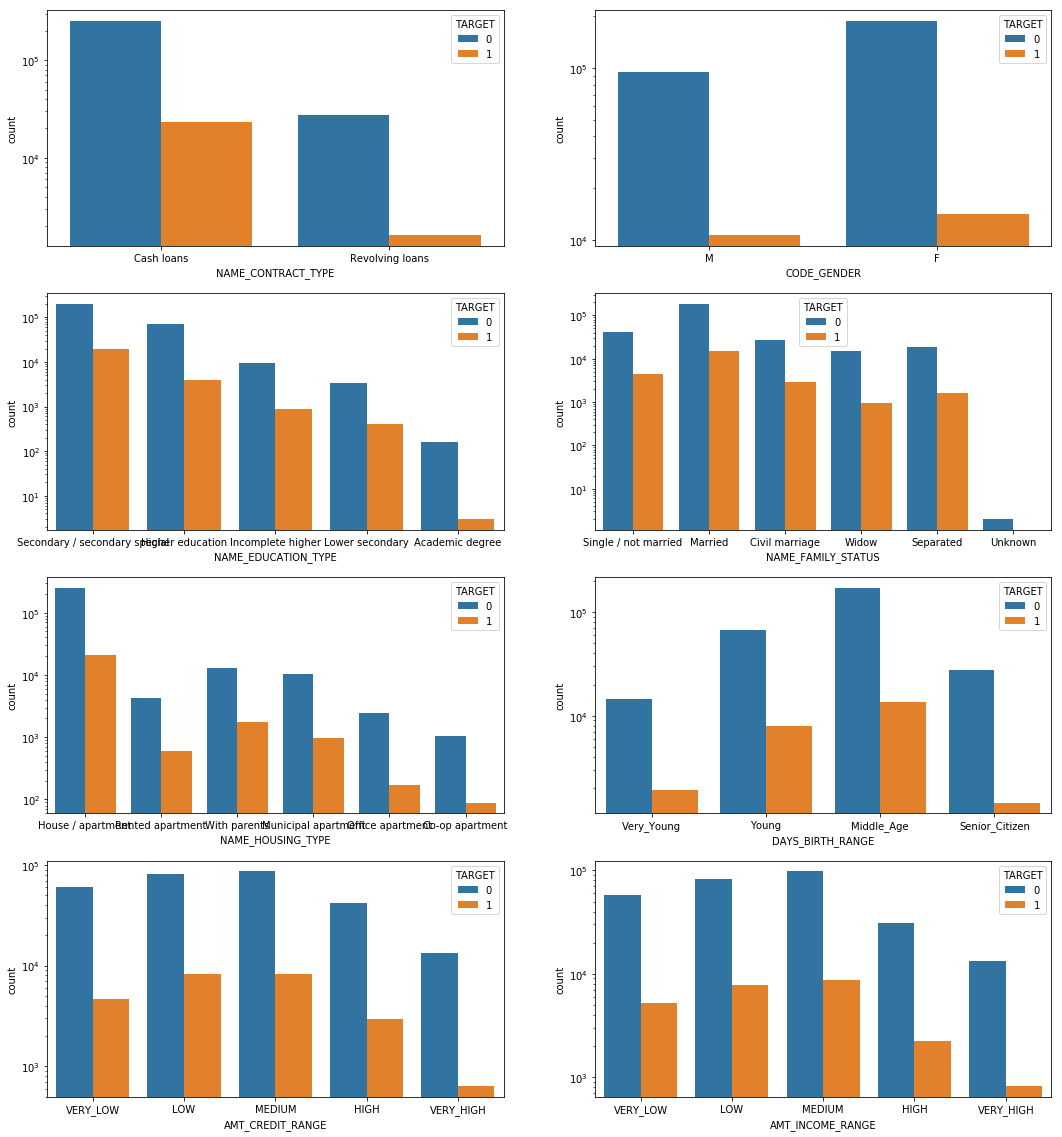

In [150]:
#Considering 8 categorical columns for a better comparative study
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'DAYS_BIRTH_RANGE','AMT_CREDIT_RANGE','AMT_INCOME_RANGE']
plt.figure(figsize=(18,20))
for i in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(i[1], data=app_df, hue='TARGET')
    plt.yscale('log')
    
plt.show()    

Inferences:
1. people with cash loans have more payment difficulties
2. females are taking up more loans as compared to males
3. secondary/special educated people are applying for loans more
4. married clients are taking up more loans
5. people with their own house/apartment are taking up more loans
6. middle age people are taking up more loans
7. people with medium and low credit amount are having more payment difficulties
8. medium income people are taking up more loans

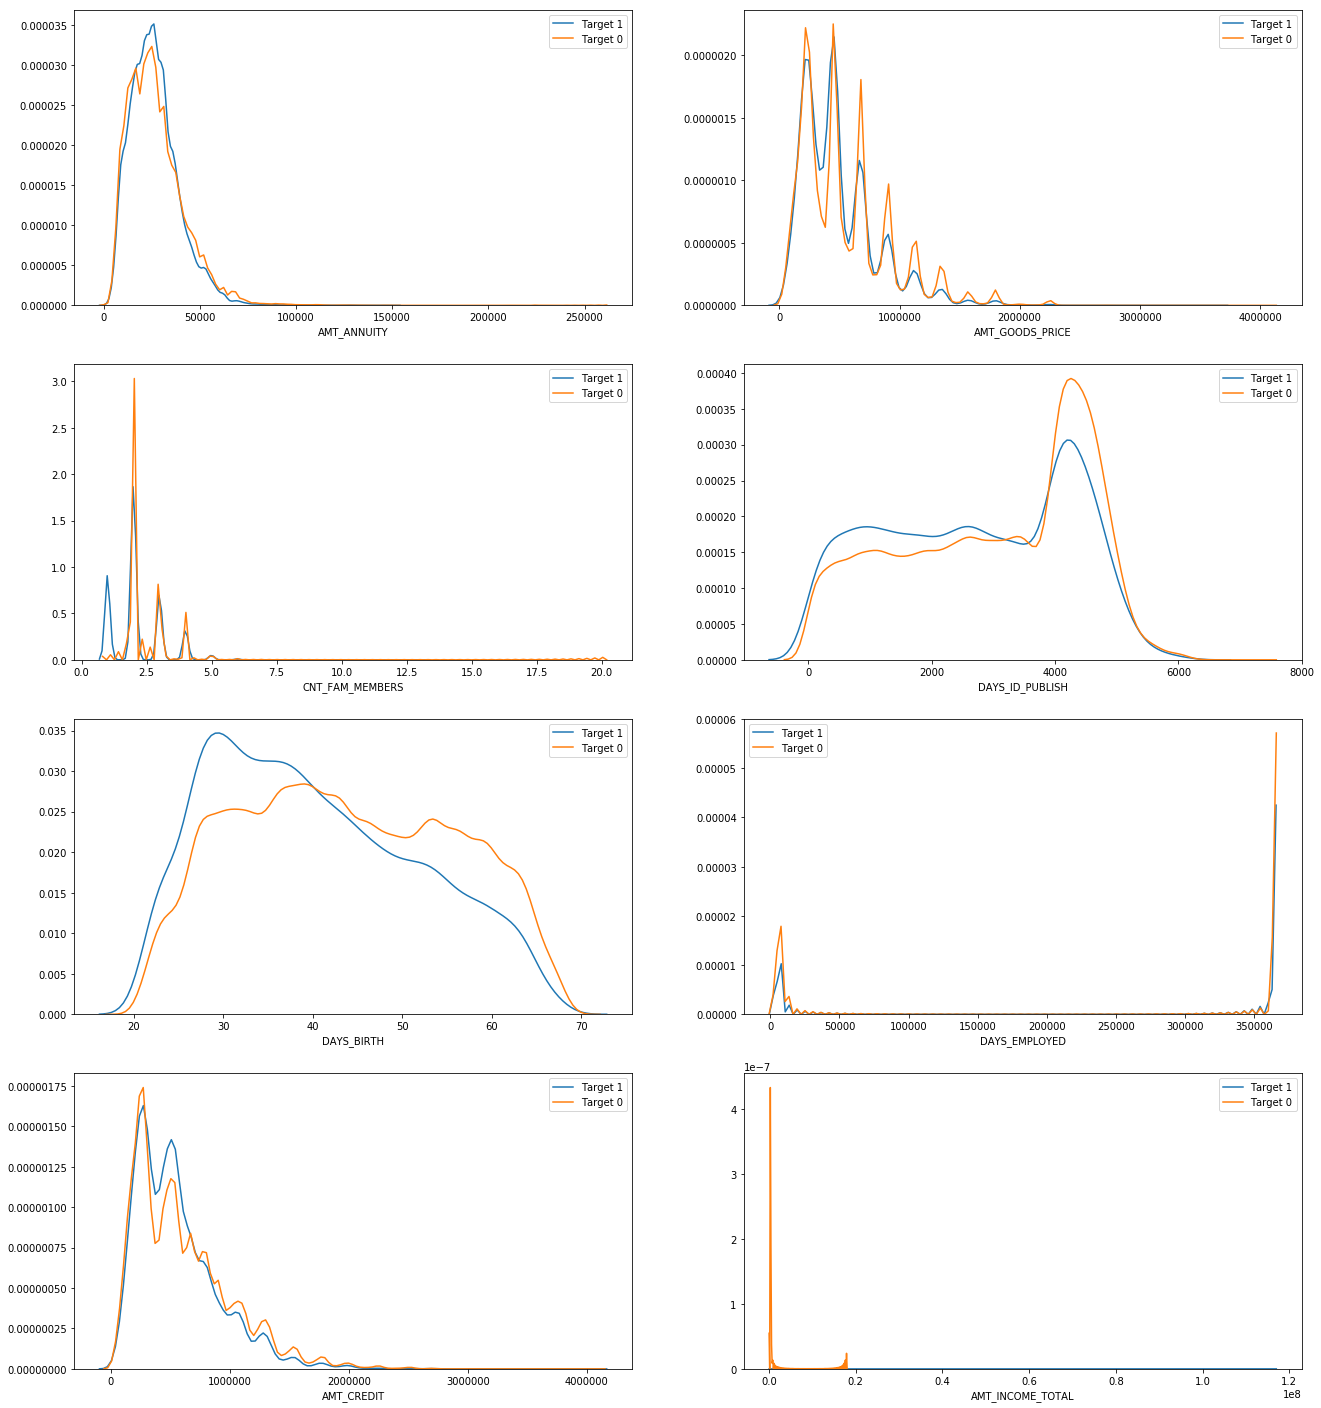

In [152]:
#Considering 8 numerical columns for a comparative study
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_ID_PUBLISH','DAYS_BIRTH',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(target1[i[1]].dropna(),hist=False,label='Target 1')
    sns.distplot(target0[i[1]].dropna(),hist=False,label='Target 0')
plt.show()

Inferences:
1. People with lower total income are more likely to default
2. low amount of credit has higher number of loans
3. People who retired tends to take more loans
4. People with age between 27yrs(10000-days) and 41(15000-days) yrs tend to take more loans
5. People whose id(s) got published between 4000 days and 5000 days ago tend to take more loans
6. nuclear family tends to take more loans
7. for less goods amount people take loans
8. low amount annuity has high number of loans

## Correlation

In [153]:
#finding correlation matrix for numerical columns for both target 0 and target 1
target0_corr = target0.iloc[0:,2:]
target1_corr = target1.iloc[0:,2:]

target0_corr_matrix = target0_corr.corr()
target1_corr_matrix = target1_corr.corr()

In [154]:
#Correlation matrix for target 0
target0_corr_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336907,-0.245174,-0.185792,0.028751,...,-0.002246,0.014137,-0.002172,0.008501,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062494,-0.140392,-0.064937,-0.022896,...,-0.027621,-0.027690,-0.027593,0.041338,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047366,-0.070104,-0.013477,0.001464,...,-0.019851,-0.000892,-0.022225,0.069540,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012254,-0.104978,-0.039436,-0.014113,...,-0.022535,-0.012893,-0.023385,0.062013,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044552,-0.068609,-0.015916,0.003649,...,-0.021025,-0.000723,-0.023171,0.071373,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025332,-0.007198,0.052083,0.001071,...,0.005941,-0.011591,0.002255,0.041164,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,-0.336907,-0.062494,0.047366,-0.012254,0.044552,0.025332,1.000000,0.626028,0.333025,0.270804,...,0.003065,-0.007321,0.001015,0.076417,-0.004446,-0.002766,0.001171,-0.002729,0.011297,0.072847
DAYS_EMPLOYED,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626028,1.000000,0.214511,0.276663,...,0.019379,0.007453,0.016383,-0.023379,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169
DAYS_REGISTRATION,-0.185792,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333025,0.214511,1.000000,0.100236,...,-0.001213,-0.008247,-0.002652,0.053533,0.002730,0.000035,0.001431,0.011857,0.000527,0.026639
DAYS_ID_PUBLISH,0.028751,-0.022896,0.001464,-0.014113,0.003649,0.001071,0.270804,0.276663,0.100236,1.000000,...,-0.000403,0.012810,-0.002491,0.082949,-0.004797,0.000198,0.001655,0.008728,0.007071,0.035639


In [155]:
#correlation matrix for target 1
target1_corr_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259222,-0.192864,-0.149154,0.032299,...,0.001448,0.025180,-0.005106,-0.011547,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003154,-0.014977,-0.000158,0.004215,...,-0.005186,-0.004616,-0.004866,0.002429,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.135070,0.001930,0.025854,0.052329,...,-0.025979,0.019487,-0.030880,0.110851,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,0.014028,-0.081207,-0.034279,0.016767,...,-0.022394,0.005500,-0.027495,0.079870,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,0.135603,0.006642,0.025679,0.056086,...,-0.021783,0.020385,-0.026179,0.118303,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,0.047956,0.015532,0.056222,0.015537,...,0.025865,0.006793,0.018231,0.055139,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602
DAYS_BIRTH,-0.259222,-0.003154,0.135070,0.014028,0.135603,0.047956,1.000000,0.582441,0.289116,0.252256,...,-0.005207,0.005482,-0.004351,0.111353,-0.014640,0.007151,0.005748,0.005685,0.017304,0.084245
DAYS_EMPLOYED,-0.192864,-0.014977,0.001930,-0.081207,0.006642,0.015532,0.582441,1.000000,0.192455,0.229090,...,0.003191,-0.008305,0.005391,0.001402,-0.007914,0.021520,0.014952,-0.025091,0.014426,0.035786
DAYS_REGISTRATION,-0.149154,-0.000158,0.025854,-0.034279,0.025679,0.056222,0.289116,0.192455,1.000000,0.096833,...,-0.010299,-0.014522,-0.009157,0.071727,0.004984,0.008367,-0.003130,-0.004876,0.012457,0.013321
DAYS_ID_PUBLISH,0.032299,0.004215,0.052329,0.016767,0.056086,0.015537,0.252256,0.229090,0.096833,1.000000,...,-0.007602,0.019594,-0.004946,0.123951,-0.003837,0.012654,-0.003047,0.014166,-0.007995,0.041730


In [156]:
#top 10 correlation pair for target 0
target0_corr_matrix.abs()
top10_corr0 = (target0_corr_matrix.where(np.triu(np.ones(target0_corr_matrix.shape), k=1).astype(np.bool)).stack()
         .sort_values(ascending=False)).head(10)
top10_corr0

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997018
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987250
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985603
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971032
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.962064
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950149
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.878571
dtype: float64

In [157]:
#top 10 correlation pair for target 1
target1_corr_matrix.abs()
top10_corr1 = (target1_corr_matrix.where(np.triu(np.ones(target1_corr_matrix.shape), k=1).astype(np.bool)).stack()
         .sort_values(ascending=False)).head(10)
top10_corr1

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998269
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997187
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
CNT_CHILDREN                  CNT_FAM_MEMBERS                 0.885484
dtype: float64

Inference:

for target 0, 
(OBS_30_CNT_SOCIAL_CIRCLE ,OBS_60_CNT_SOCIAL_CIRCLE) , (FLOORSMAX_AVG , FLOORSMAX_MEDI),        (YEARS_BEGINEXPLUATATION_AVG , YEARS_BEGINEXPLUATATION_MEDI) are the highest correlated pairs.

for target 1,
(OBS_30_CNT_SOCIAL_CIRCLE , OBS_60_CNT_SOCIAL_CIRCLE ), (FLOORSMAX_AVG, FLOORSMAX_MEDI),
(YEARS_BEGINEXPLUATATION_AVG , YEARS_BEGINEXPLUATATION_MEDI) are the highest correlated pairs.

Hence, variables of these pairs are closely related to each other

## Bivariate Analysis

In [158]:
#defining a function for bivariate analysis of categorical variables
def bivar_plot(col1, col2):
    pd.crosstab(index=col1,columns=col2).plot(kind="bar", figsize=(5,5),stacked=False)
    plt.xticks(rotation=0)
    plt.show()

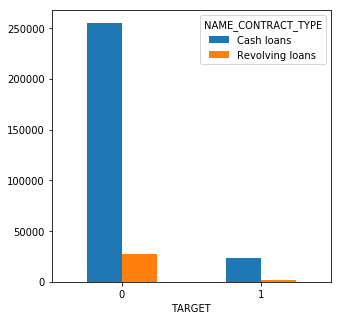

In [159]:
#TARGET vs NAME_CONTRACT_TYPE
bivar_plot(app_df['TARGET'], app_df['NAME_CONTRACT_TYPE'])

there are more cash loans than revolving loans

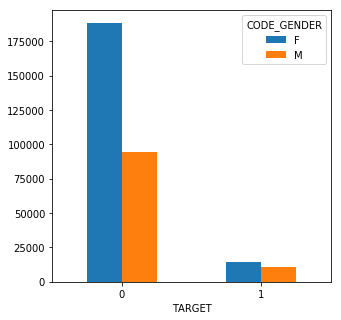

In [160]:
#TARGET vs CODE_GENDER
bivar_plot(app_df['TARGET'], app_df['CODE_GENDER'])

There are more females taking up loans. It seems more percentage of males have payment difficulties as compared to females.

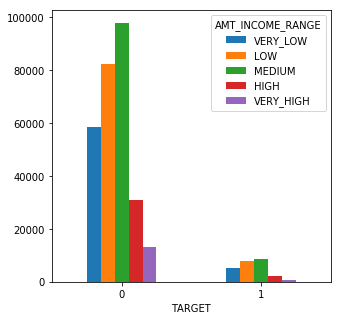

In [161]:
#TARGET vs AMT_INCOME_RANGE
bivar_plot(app_df['TARGET'], app_df['AMT_INCOME_RANGE'])

people with medium income are taking up more loans 

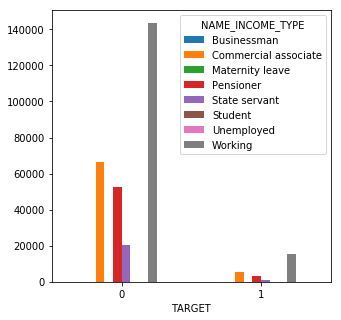

In [59]:
#TARGET vs NAME_INCOME_TYPE
bivar_plot(app_df['TARGET'], app_df['NAME_INCOME_TYPE'])

working people are taking up more loans

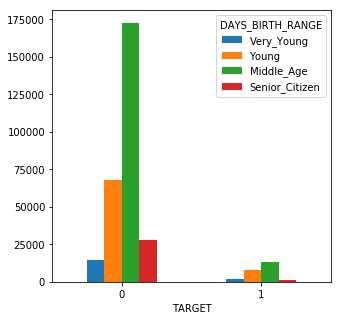

In [162]:
#TARGET vs DAYS_BIRTH_RANGE
bivar_plot(app_df['TARGET'], app_df['DAYS_BIRTH_RANGE'])

middle age people are taking up more loans

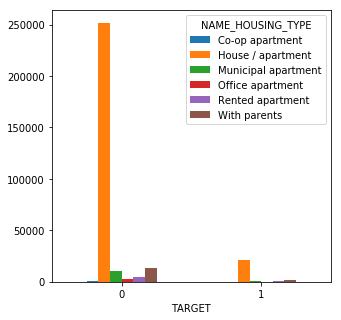

In [163]:
#TARGET vs NAME_HOUSING_TYPE
bivar_plot(app_df['TARGET'], app_df['NAME_HOUSING_TYPE'])

people who own house/apartment take up more loan

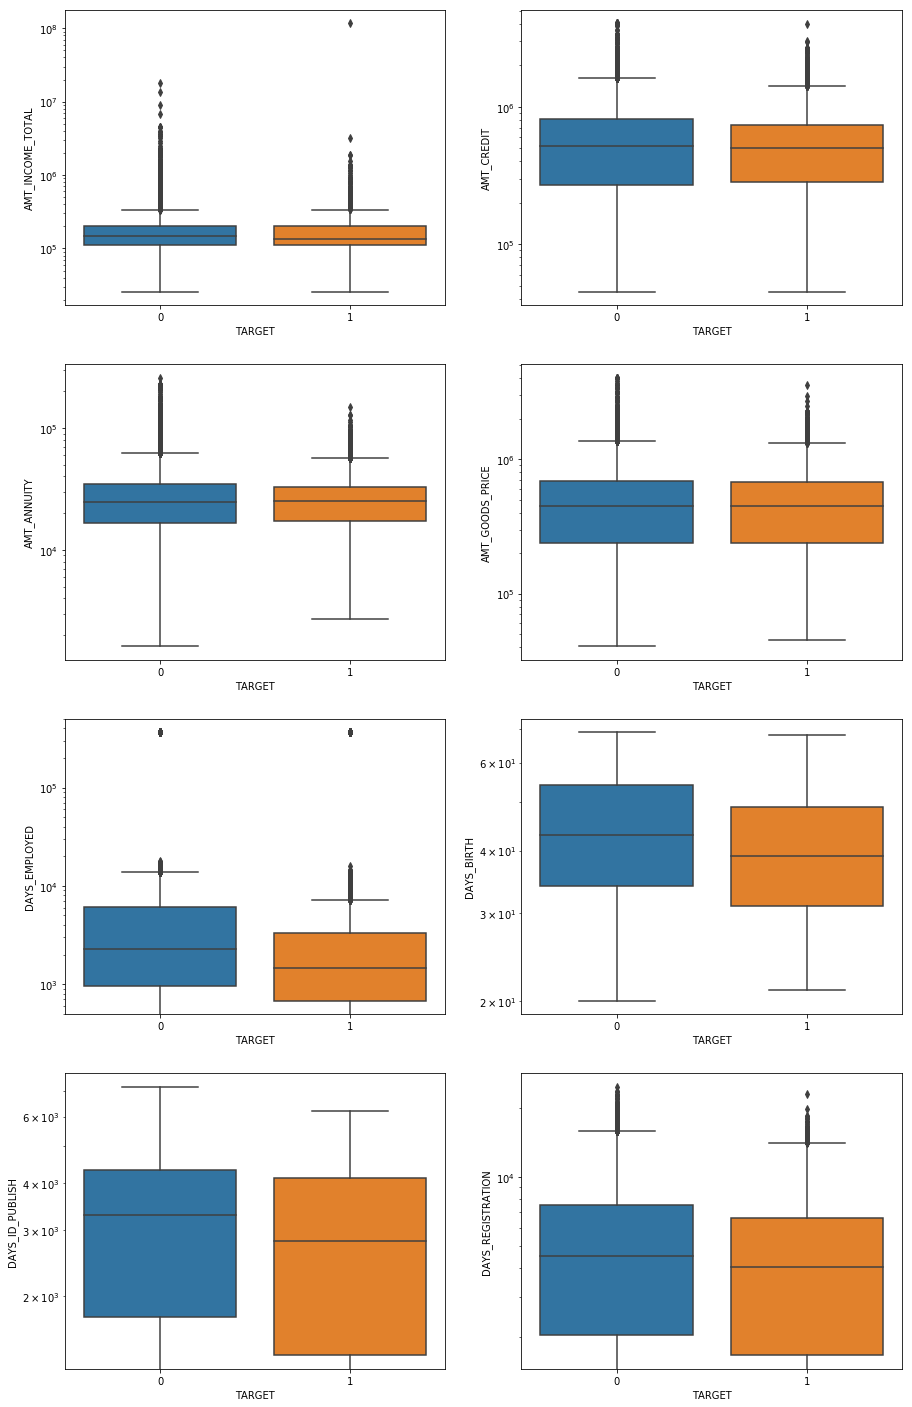

In [164]:
#considering 8 numerical columns for comparative study
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=app_df[i[1]].dropna(),data=app_df)
    plt.yscale('log')
plt.show() 

Inferences:

1. There are more clients who changed their registration details after 4000 days of approval of loan.
2. For a few target 0 clients, time taken to publish id's are higher than target 1 clients.
3. People with greater number of days born count are less likely to have difficulty in making payments.
4. In target 0 case, AMT_GOODS PRICE contains more outliers than target 1 case.
5. In target 1 case, most of the clients' annuity amount tends to be greater than the median value.
6. For credit amount greater than 50000 theres less payment difficulties as compared to other cases and vice versa.
7. People with higher no of employment days have less payment difficulties.
8. Most of the people with payment difficulties have less total income.

In [165]:
#reading the previous application data
previous_df=pd.read_csv("previous_application.csv")
previous_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
#checking number of rows and columns in the dataset
previous_df.shape

(1670214, 37)

In [167]:
#checking datatypes of the columns 
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [168]:
#describing the numerical variables
previous_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [169]:
#finding missing value percentage
missing_perc = (previous_df.isnull().sum()/len(previous_df))*100
missing_perc.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [170]:
#checking for columns with null percentage >= 50 and dropping those columns
missing_col = list(missing_perc[missing_perc.values>=50].index)
previous_df.drop(labels=missing_col, axis=1, inplace=True)

In the columns below that have negative or mixed values, we will replace them with the absolute values for our analysis

In [171]:
#checking for columns starting with 'DAYS' and their values
filter_coll = []
for col in previous_df:
    if col.startswith('DAYS'):
        print(col, ' ' , previous_df[col].unique())
        filter_coll.append(col)
        
print(filter_coll)    

DAYS_DECISION   [  -73  -164  -301 ... -1967 -2389    -1]
DAYS_FIRST_DRAWING   [ 3.65243e+05          nan -2.77000e+02 ... -1.61100e+03 -1.77000e+03
 -1.87900e+03]
DAYS_FIRST_DUE   [  -42.  -134.  -271. ... -2842. -1774. -2892.]
DAYS_LAST_DUE_1ST_VERSION   [ 300.  916.   59. ... 1878. 2016. 1760.]
DAYS_LAST_DUE   [-4.20000e+01  3.65243e+05 -1.82000e+02 ... -2.86700e+03 -2.86600e+03
 -2.83300e+03]
DAYS_TERMINATION   [-3.70000e+01  3.65243e+05 -1.77000e+02 ... -2.82800e+03 -2.87000e+03
 -2.81500e+03]
['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']


In [172]:
#replacing it with absolute values
previous_df[filter_coll] = abs(previous_df[filter_coll])

In [173]:
#rechecking the columns
previous_df[filter_coll]

,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,73.0,365243.0,42.0,300.0,42.0,37.0
1,164.0,365243.0,134.0,916.0,365243.0,365243.0
2,301.0,365243.0,271.0,59.0,365243.0,365243.0
3,512.0,365243.0,482.0,152.0,182.0,177.0
4,781.0,NaN,NaN,NaN,NaN,NaN
5,684.0,365243.0,654.0,144.0,144.0,137.0
6,14.0,NaN,NaN,NaN,NaN,NaN
7,21.0,NaN,NaN,NaN,NaN,NaN
8,386.0,NaN,NaN,NaN,NaN,NaN
9,57.0,NaN,NaN,NaN,NaN,NaN


In [174]:
#merging the application dataframe and previous application dataframe
merged_df=pd.merge(left=app_df,right=previous_df,how='inner',on='SK_ID_CURR',suffixes=('_x', '_y'))

In [78]:
#checking the merged dataframe
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


##### Univariate Analysis

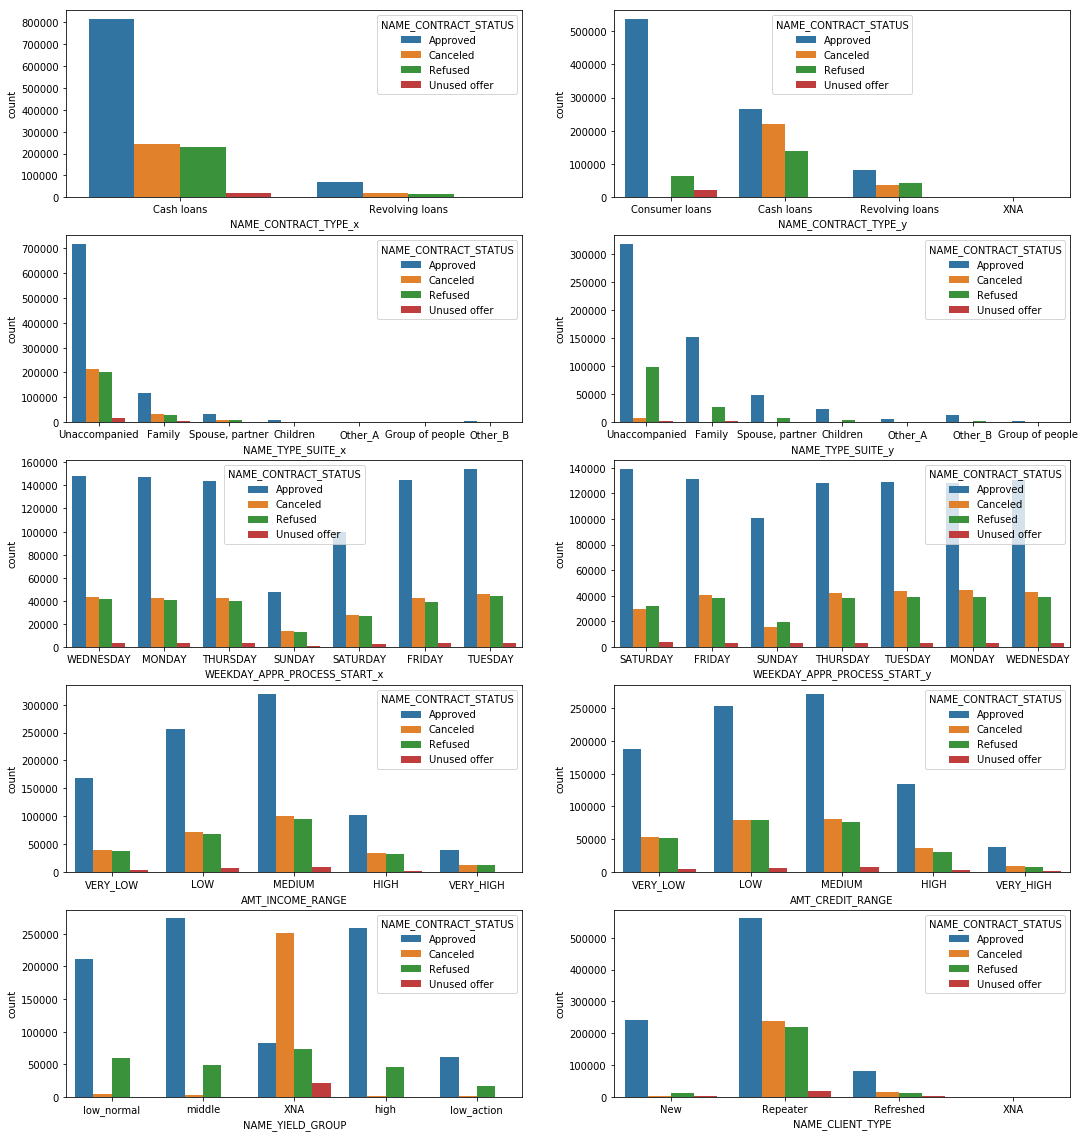

In [175]:
#Univariate Analysis of Categorical columns
categorical_columns=['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y',
                     'NAME_TYPE_SUITE_x','NAME_TYPE_SUITE_y',
                     'WEEKDAY_APPR_PROCESS_START_x','WEEKDAY_APPR_PROCESS_START_y',
                    'AMT_INCOME_RANGE','AMT_CREDIT_RANGE','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


plt.figure(figsize=(18,20))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    
plt.show()

Inferences:
1. Repeater has highest number of approved loans.
2. Middle NAME_YIELD_GROUP has highest approval.
3. For Medium AMT_CREDIT_RANGE approval is highest.
4. Medium income people has the highest approvals.
5. In previous application, saturday has the highest approvals.
6. In current application ,it is tuesday with highest approvals.
7. Both in NAME_CONTRACT_TYPE_x and NAME_CONTRACT_TYPE_y unaccompanied has the highest number.
8. Currently bank is only giving two types of loans : Cash and Revolving Loans.
9. Previously bank was providing Cash, Revolving and Consumer loans.
10. Previously, Number of consumer loans were highest and currently, cash loans has the highest number.

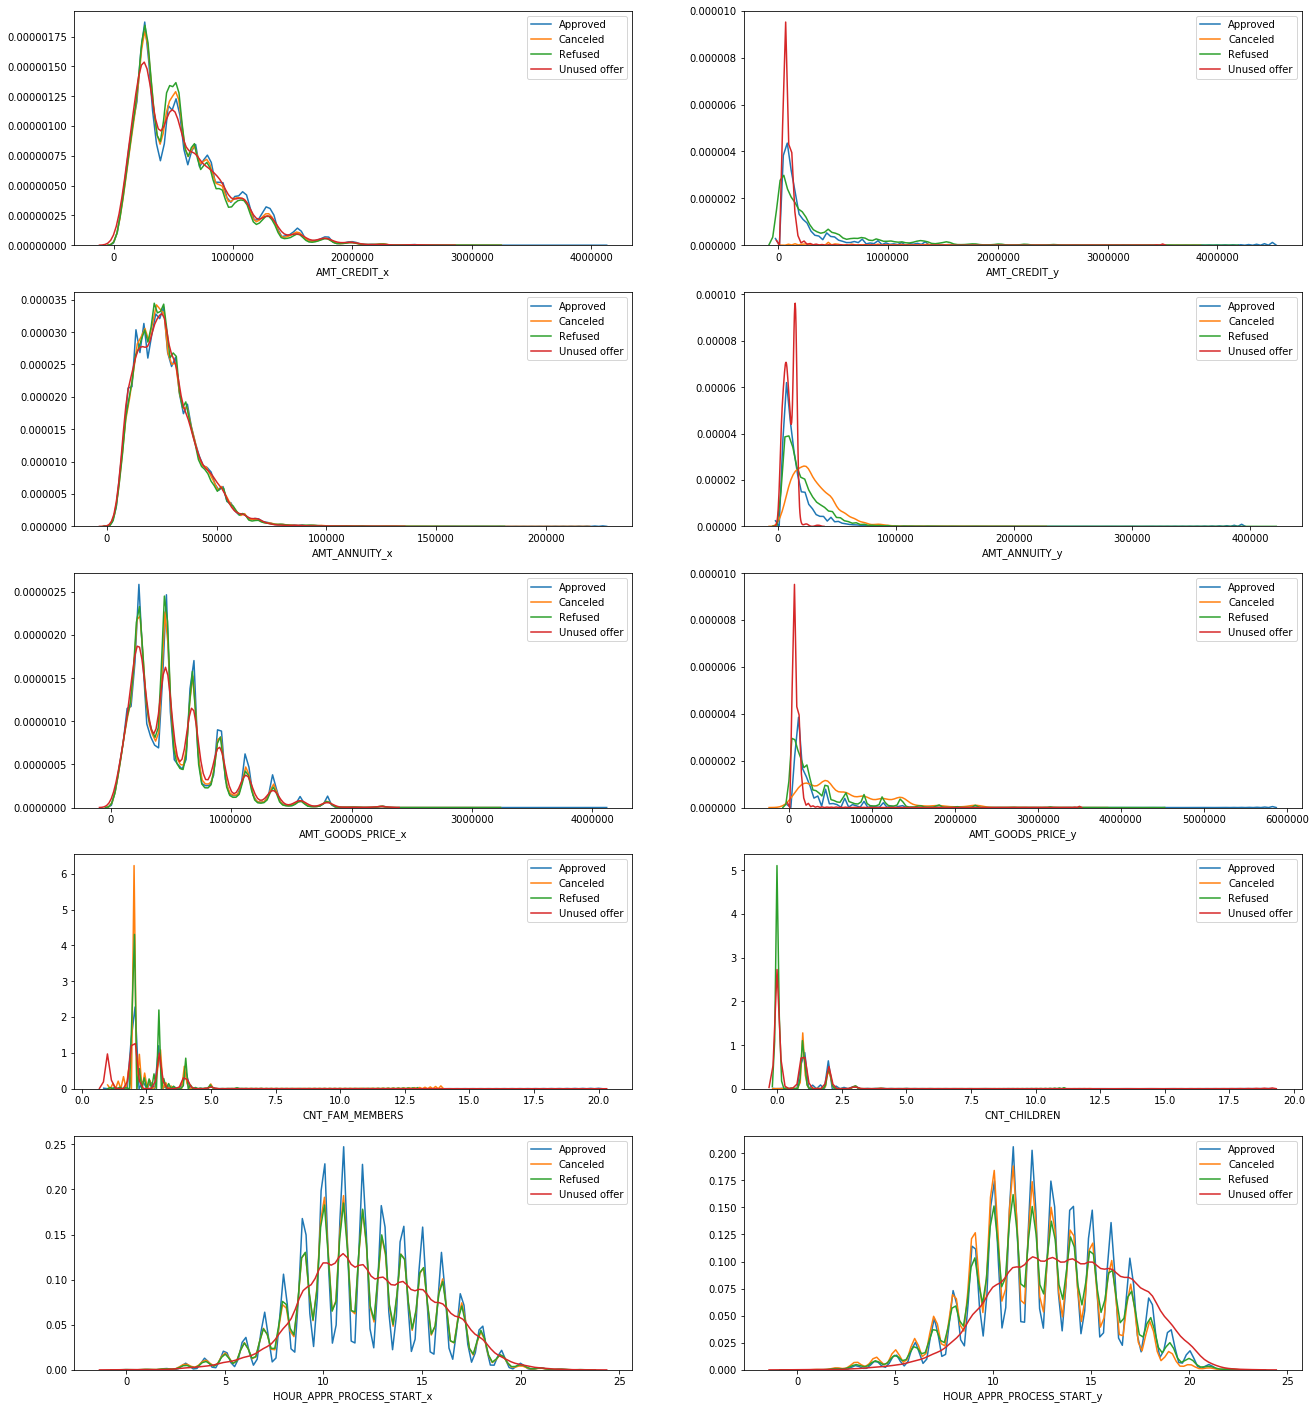

In [176]:
#Univariate Analysis of numerical columns
continous_columns=['AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y',
                   'AMT_GOODS_PRICE_x','AMT_GOODS_PRICE_y','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y']
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')
plt.show()

Inferences:

1. High number of applications are filed in 9 AM to 2 PM for both Current and Previous data.
2. So busiest hours for bank are form 9 AM to 2 PM.
3. family with lesser number of children tends to take more loans
4. nuclear families tend to take more loans
4. for lesser goods values, previously bank had high unused offers but currently its a mix of approved, refuces and cancelled
5. for lesser annuity amount, previously bank had high unused offers but currently there's more refuced and cancelled
6. for lesser credit amount, previously bank had high unused offers and currently its a mix of all the categories

##### Bivariate Analysis

In [185]:
#Defining a function for bivariate analysis on merged data
def bivar_merge_plot(col1, col2):
    pd.crosstab(index=col1,columns=col2).plot(kind="bar", figsize=(5,5),stacked=False)
    plt.xticks(rotation=0)
    plt.show()

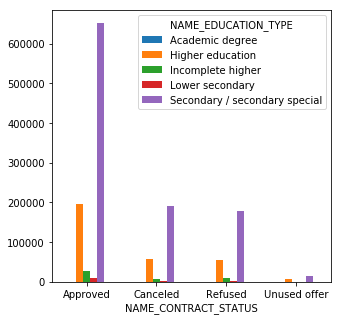

In [187]:
#NAME_CONTRACT_STATUS VS NAME_EDUCATION_TYPE
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_EDUCATION_TYPE'])

Secondary/secondary special applications got approved more number of times.

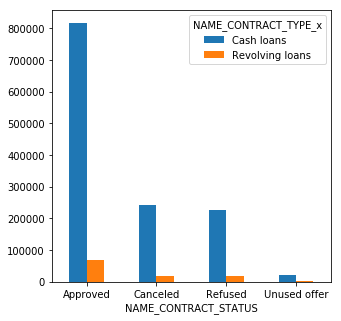

In [188]:
#NAME_CONTRACT_STATUS VS NAME_CONTRACT_TYPE_x(application data)
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_CONTRACT_TYPE_x'])

Cash loan applications got approved more number of times for current application data

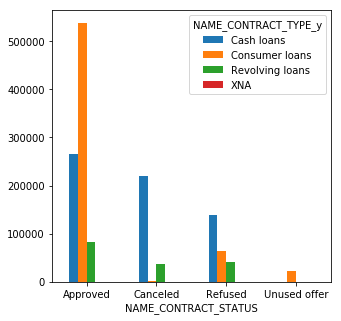

In [189]:
#NAME_CONTRACT_STATUS VS NAME_CONTRACT_TYPE_y(previous data)
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_CONTRACT_TYPE_y'])

consumer loan applications got approved more number of times for previous data

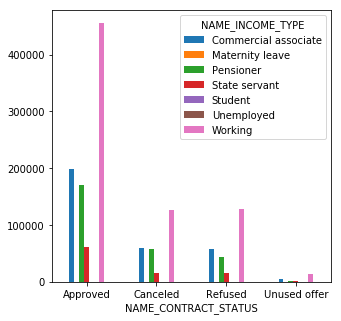

In [190]:
#NAME_CONTRACT_STATUS VS NAME_INCOME_TYPE
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_INCOME_TYPE'])

working people's applications got approved more number of times

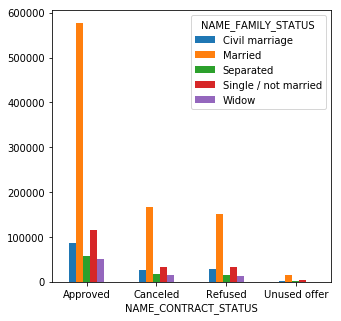

In [191]:
#NAME_CONTRACT_STATUS VS NAME_FAMILY_STATUS
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_FAMILY_STATUS'])

married people's applications got approved more number of times

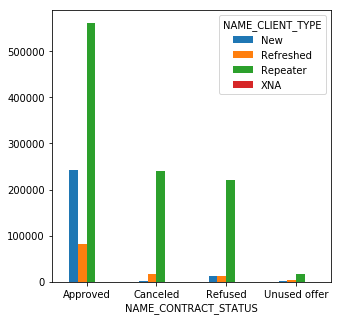

In [192]:
#NAME_CONTRACT_STATUS VS NAME_CLIENT_TYPE
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_CLIENT_TYPE'])

Repeater client's applications got approved more number of times

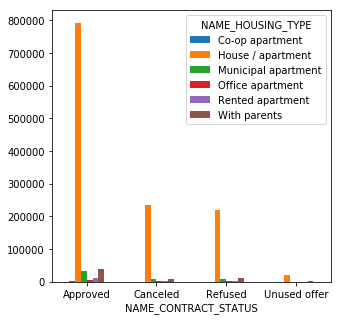

In [193]:
#NAME_CONTRACT_STATUS VS NAME_HOUSING_TYPE
bivar_merge_plot(merged_df['NAME_CONTRACT_STATUS'], merged_df['NAME_HOUSING_TYPE'])

people with their own house/apartment got application approval more number of times

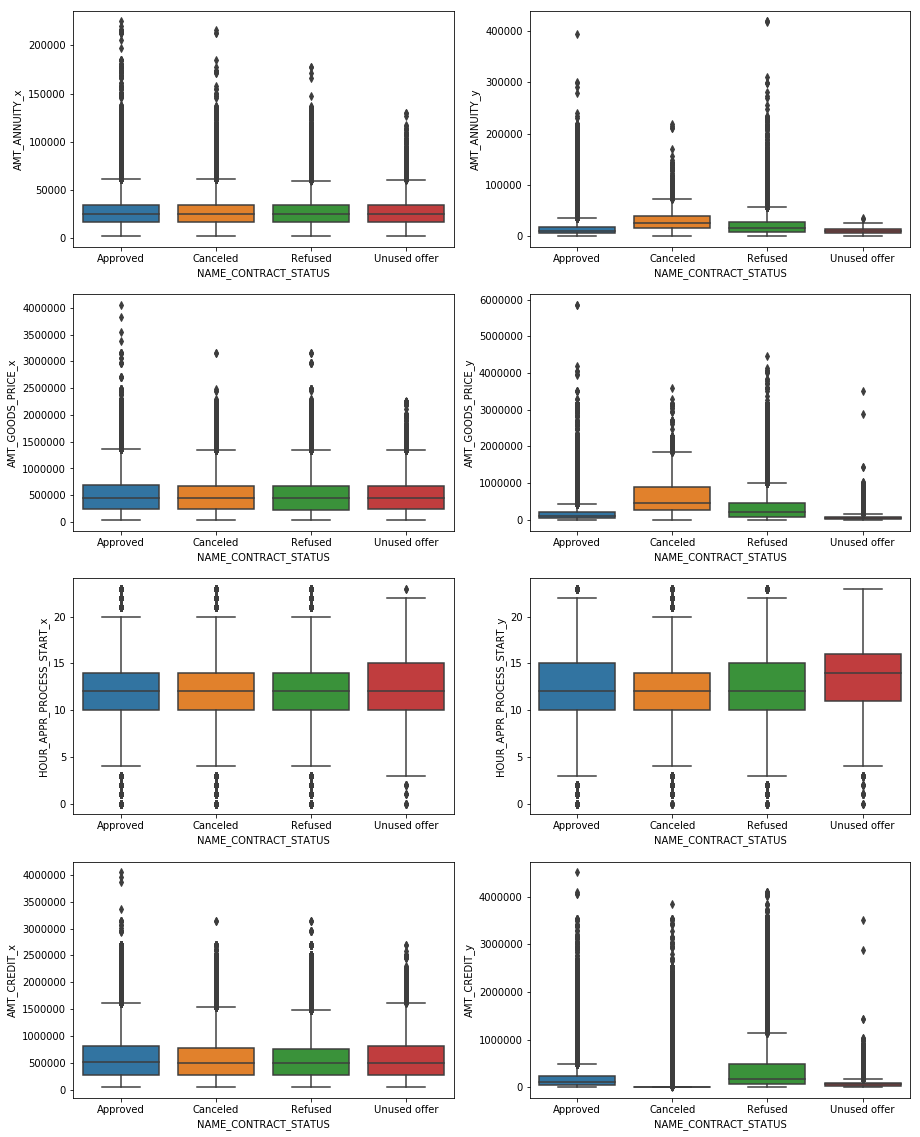

In [182]:
#Bivariate Analysis of numerical columns
continous_columns=['AMT_ANNUITY_x','AMT_ANNUITY_y',
                   'AMT_GOODS_PRICE_x','AMT_GOODS_PRICE_y',
                  'HOUR_APPR_PROCESS_START_x','HOUR_APPR_PROCESS_START_y',
                   'AMT_CREDIT_x','AMT_CREDIT_y']
                   
plt.figure(figsize=(15,20))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

Inferences:

1. AMT_CREDIT_y (prev) has highest refused cases and AMT_CREDIT_x (current) is similar for all 4 cases.
2. Time spent in unused offer is higher as compared to other categories. 
3. Previously there were more applications that got cancelled or refused with respect to their good's value, but currently the condition for all the four contract statuses is similar
4. Previously there were more applications that got cancelled or refused with respect to their annuity amount, but currently the condition for all the four contract statuses is similar

### Conclusion

Columns with information about Age, Gender, Income, Housing, Type of client, Annuity amount, Type of contract, should be used before approving a loan. That would help in minimizing the loss to the company/bank.
As seen in our Analysis, these columns give us a good idea about defaulters status and contract approval status. 
Hence these columns would lead the bank/company in the right direction in line with the business point of view.